# WINNING HORSE - Modelo de datos

In [15]:
# Lectura de información
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Otros
import itertools
import matplotlib.mlab as mlab
import seaborn as sns

# DataScience
import joblib
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #Solo para numéricas
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier


## DataSet

In [16]:
df = pd.read_csv("../data/results/winning_horse_limpieza.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        14996 non-null  object 
 1   Distance                      14996 non-null  int64  
 2   Category                      14996 non-null  object 
 3   MajorEvent                    14996 non-null  float64
 4   GroundCondition               14996 non-null  float64
 5   Stick                         14996 non-null  float64
 6   HorseName                     14996 non-null  object 
 7   StartingStall                 14996 non-null  int64  
 8   Weight                        14996 non-null  int64  
 9   JockeyName                    14996 non-null  object 
 10  ChampionshipType              14996 non-null  object 
 11  OwnerName                     14996 non-null  object 
 12  TOP1                          14996 non-null  int64  
 13  T

In [17]:
print(df.head(10));

  Region  Distance Category  MajorEvent  GroundCondition     Stick  \
0  SOUTH      2646     -100         1.0         5.188576  7.177653   
1  SOUTH      2646     -100         1.0         5.188576  7.177653   
2  SOUTH      2646     -100         1.0         5.188576  7.177653   
3  SOUTH      2646     -100         1.0         5.188576  7.177653   
4  SOUTH      2646     -100         1.0         5.188576  7.177653   
5  SOUTH      2646     -100         1.0         5.188576  7.177653   
6  SOUTH      2646     -100         1.0         5.188576  7.177653   
7  SOUTH      2646     -100         1.0         5.188576  7.177653   
8  SOUTH      2646     -100         1.0         5.188576  7.177653   
9  SOUTH      2646     -100         1.0         5.188576  7.177653   

               HorseName  StartingStall  Weight         JockeyName  ...  \
0     Sonny Liston (IRE)             12     128       Tom Marquand  ...   
1   Grand Alliance (IRE)              5     128     Daniel Tudhope  ...   
2   

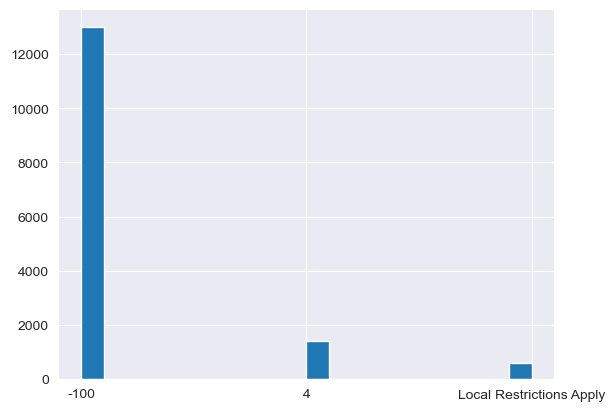

In [18]:
plt.hist(df["Category"], bins=20, label="Category")
plt.show()

### Correlaciones

Text(0.5, 1.0, 'Correlation Matrix')

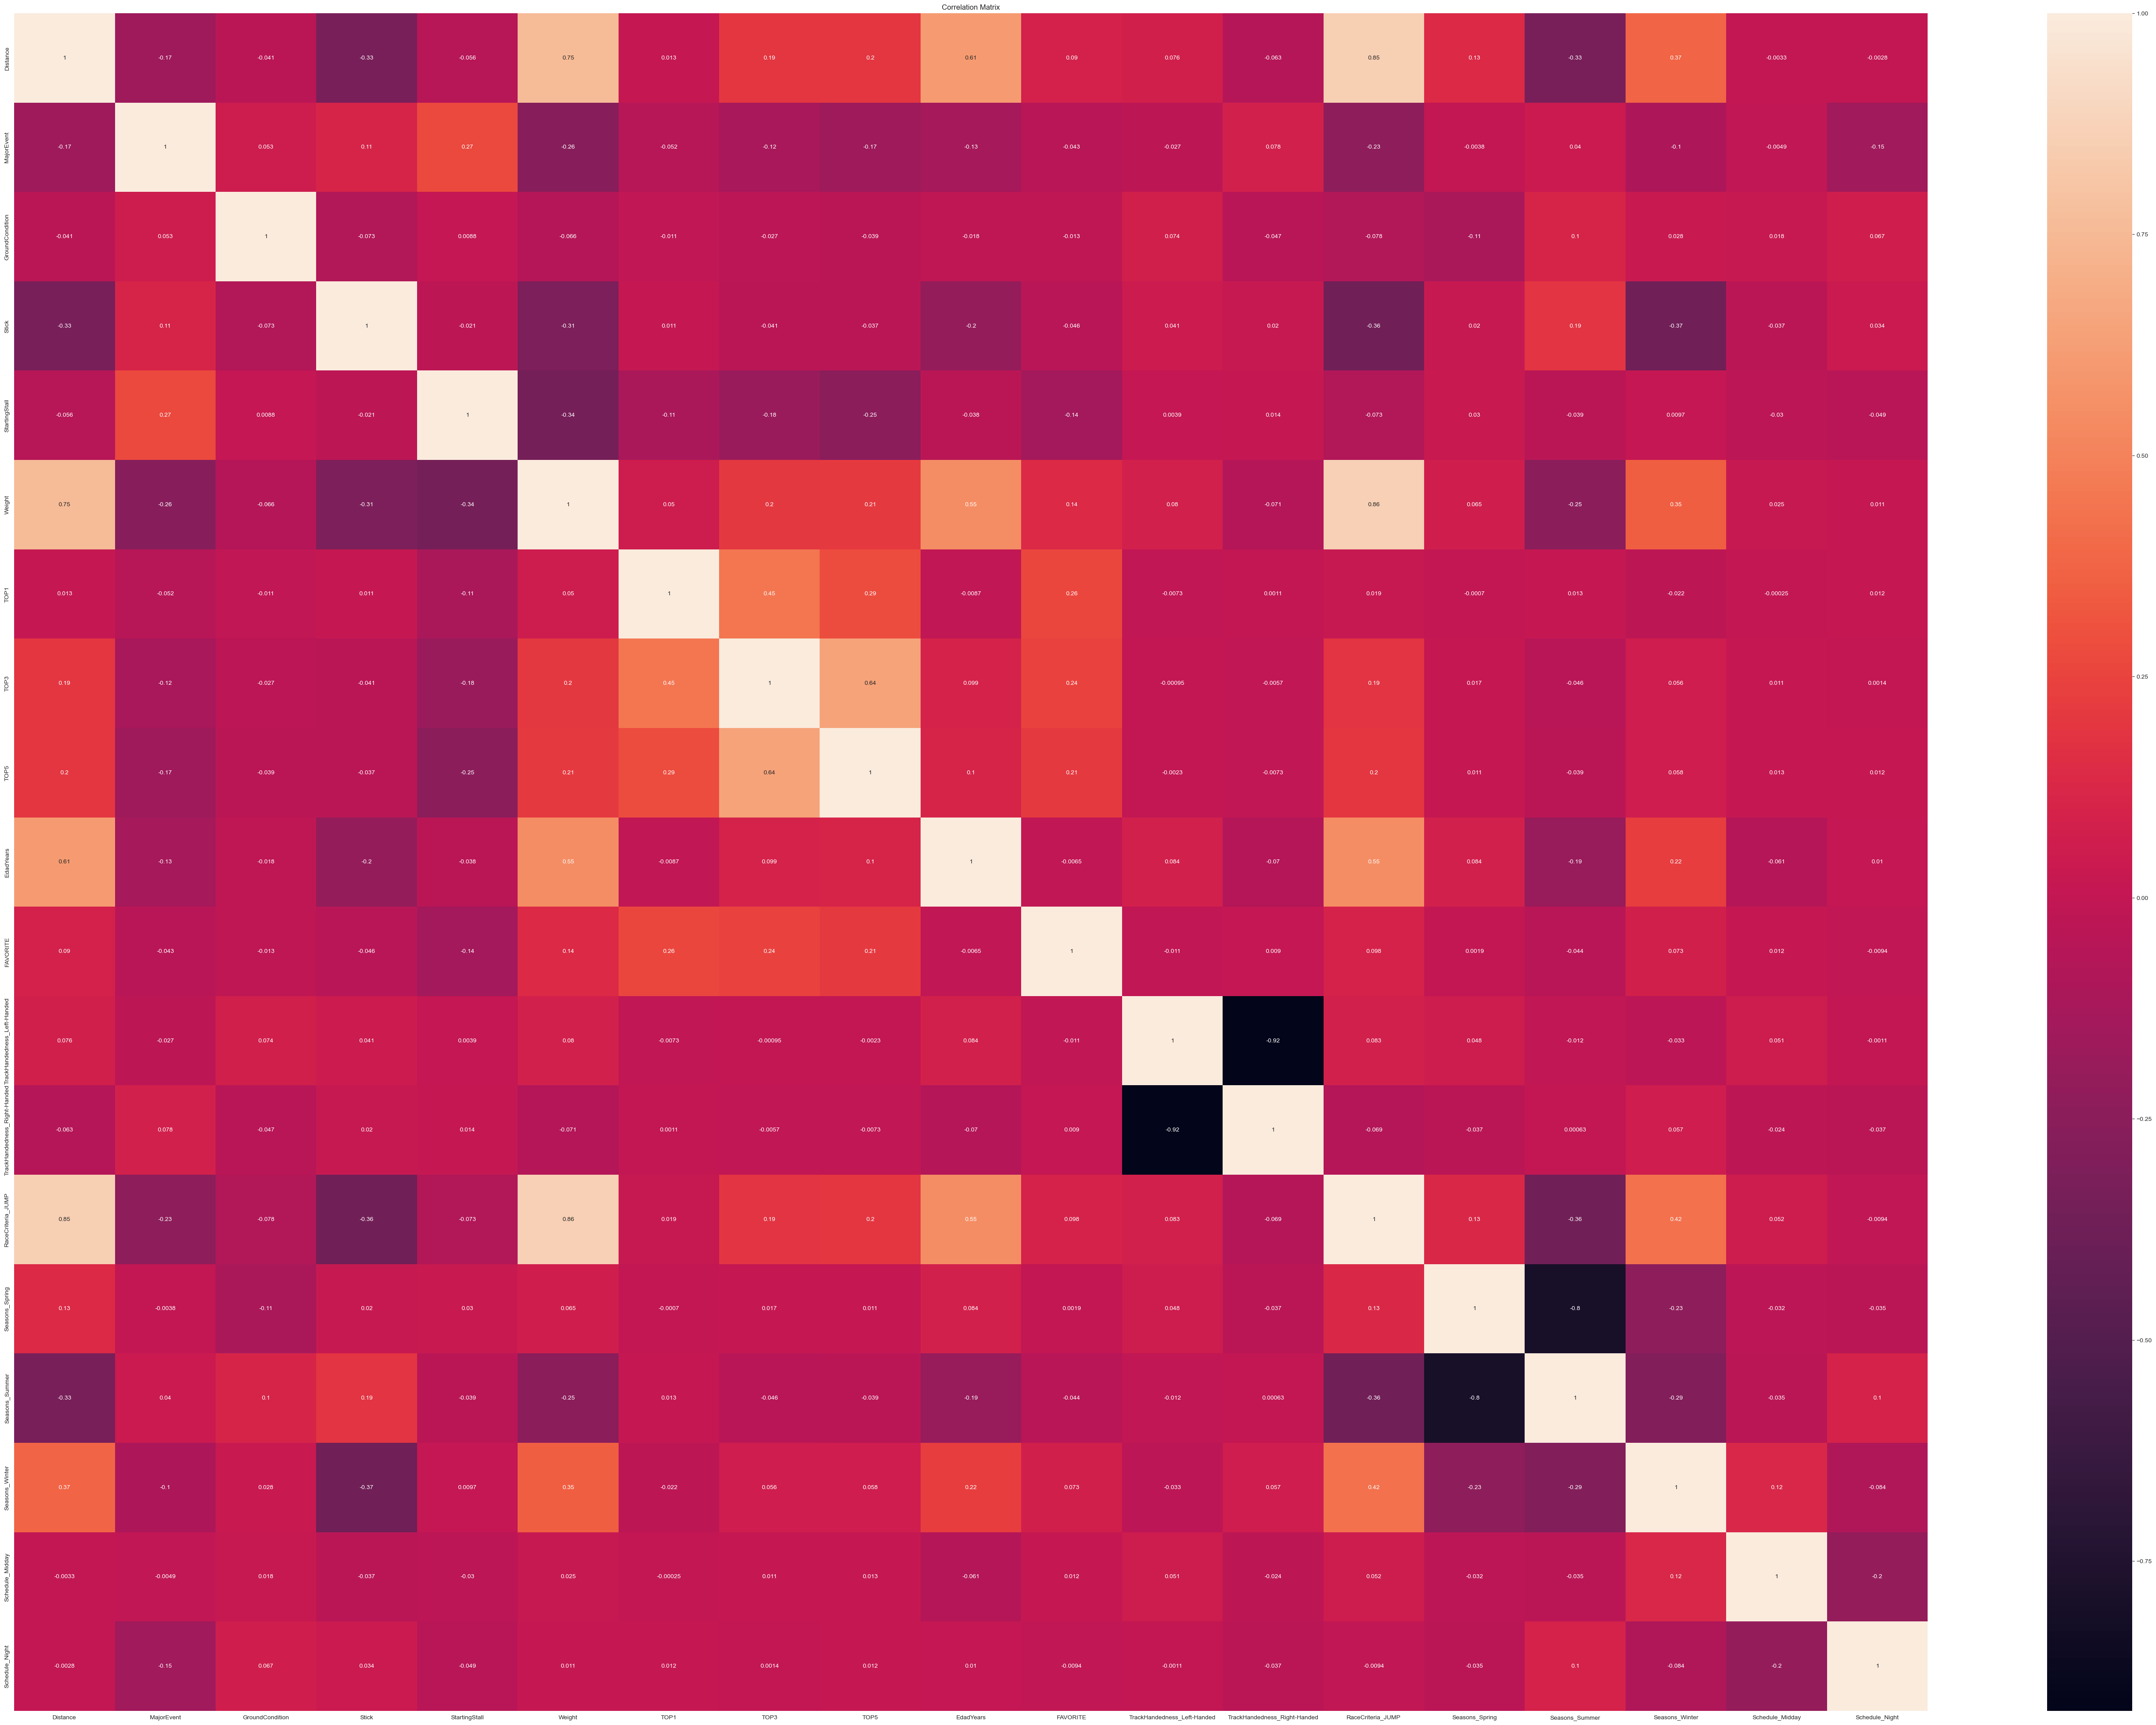

In [19]:
corr = df.corr(numeric_only=True)

# Pintemos las correlaciones
plt.figure(figsize=(70, 50))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

## FASE DE ENTRENAMIENTO

In [20]:
#Naive Bayes Categorico necesita codificar todas las variables categóricas en Dummies
#Escoger entre df_Flat y df_Jump
muestra = pd.get_dummies(df)

#Eliminamos todos los dataframes utilizados hasta ahora para liberar espacio
#del (df, df_Flat, df_Jump, dummies)

#Extraemos las variables dependientes y las independientes
X = muestra.drop(["TOP1", "TOP3", "TOP5"], axis = 1)
y_top1 = muestra["TOP1"]
y_top3 = muestra["TOP3"]
y_top5 = muestra["TOP5"]

y_multi = muestra[["TOP1","TOP3","TOP5"]]

#Eliminamos el dataframe original para ahorrar espacio
del (muestra)

### Guardamos las columnas para poder recuperarlas

In [31]:
#
dataColumns = {};
for i in X.columns:
    dataColumns[i] = 0
results = pd.DataFrame([dataColumns], columns=X.columns)
results.to_csv("../data/predictions/columns_X.csv", encoding='utf-8', index=False)

Separación del dataframe en Train y Test (80/20 manteniendo distribución)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_top1, test_size=0.2, random_state=0, stratify=y_top1)

Generación de un modelo Bayesiano

In [23]:
Gnb=GaussianNB()

Entrenamiento del modelo

In [24]:
Gnb.fit(X_train, y_train)

GaussianNB()

Guardamos el modelo

In [25]:
joblib.dump(Gnb, '../models/Gnb.pkl')

['../models/Gnb.pkl']

In [26]:
Gnb = joblib.load('../models/Gnb.pkl')
Gnb.score(X_test, y_test)

0.33166666666666667

## FASE DE EVALUACIÓN

### Evaluación Clase única (depuración)

In [27]:
y_pred=Gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.27      0.42      2658
           1       0.12      0.80      0.21       342

    accuracy                           0.33      3000
   macro avg       0.52      0.53      0.32      3000
weighted avg       0.82      0.33      0.40      3000



In [28]:
print(X_test)

       Distance  MajorEvent  GroundCondition     Stick  StartingStall  Weight  \
14556      1760         0.0         4.000000  8.400000              1     135   
7013       3433         0.0         5.000000  6.300000              3     161   
14748      3590         0.0         4.000000  7.800000              1     154   
2354       1100         1.0         4.000000  7.200000              3     126   
1897       1546         1.0         4.000000  7.000000              6     130   
...         ...         ...              ...       ...            ...     ...   
6090       1323         0.0         5.000000  6.100000              3     134   
4140       1337         1.0         5.188576  7.800000              3     131   
5413       2256         0.0         4.000000  6.500000              3     139   
13790      1590         1.0         4.000000  7.500000             11     131   
1845       1540         1.0         3.000000  7.177653              2     131   

       EdadYears  FAVORITE 

### Evaluación Multiclase

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=0, stratify=y_multi)
ovr_clf=OneVsRestClassifier(GaussianNB()).fit(X_train,y_train)
# ovr_clf.predict_proba(X_test)

joblib.dump(ovr_clf, '../models/ovr_clf.pkl')

y_pred_multi = ovr_clf.predict(X_test)
print(classification_report(y_test,y_pred_multi))

              precision    recall  f1-score   support

           0       0.13      0.81      0.22       342
           1       0.49      0.62      0.55      1181
           2       0.73      0.51      0.60      1829

   micro avg       0.40      0.58      0.47      3352
   macro avg       0.45      0.65      0.46      3352
weighted avg       0.58      0.58      0.54      3352
 samples avg       0.28      0.34      0.29      3352



/Users/andersonstivenbarbosa/opt/anaconda3/envs/TfmWinningHorses/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andersonstivenbarbosa/opt/anaconda3/envs/TfmWinningHorses/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
